<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Method-using-a-simple-function" data-toc-modified-id="1.-Method-using-a-simple-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Method using a simple function</a></span></li><li><span><a href="#2.-Integration-method-by-meta" data-toc-modified-id="2.-Integration-method-by-meta-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Integration method by meta</a></span></li></ul></div>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
sys.path.append("../")
sys.path.append("../..")

intDataInfo = { "db_info":[ { "db_name":"farm_inner_air", "measurement":"HS1", "start":"2020-09-11 00:00:00", "end":"2020-10-18 00:00:00" },
 { "db_name":"farm_outdoor_air", "measurement":"sangju", "start":"2020-09-11 00:00:00", "end":"2020-10-18 00:00:00" }, 
 { "db_name":"farm_outdoor_weather", "measurement":"sangju", "start":"2020-09-11 00:00:00", "end":"2020-10-18 00:00:00" } ] }

start_time = "2020-08-01 00:00:00"
end_time ="2022-05-01 00:00:00"
intDataInfo= { "db_info":[ 
    {"db_name":"air_indoor_어린이집", "measurement":"ICW0W2000641", "start":start_time, "end":end_time},
   {"db_name":"farm_outdoor_weather", "measurement":"seoul", "start":start_time, "end":end_time},
   {"db_name":"farm_outdoor_air_clean", "measurement":"seoul", "start":start_time, "end":end_time},
]}

intDataInfo= { "db_info":[ 
   {"db_name":"farm_outdoor_weather", "measurement":"seoul", "start":start_time, "end":end_time},
   {"db_name":"finance_korean_stock", "measurement":"stock","tag_key":"company", "tag_value":"AJ네트웍스", "start":start_time, "end":end_time}
]}
refine_param = {
    "removeDuplication":{"flag":True},
    "staticFrequency":{"flag":True, "frequency":None}
}
outlier_param  = {
    "certainErrorToNaN":{"flag":True},
    "unCertainErrorToNaN":{
        "flag":False,
        "param":{}
    }
}


imputation_param = {
    "serialImputation":{
        "flag":True,
        "imputation_method":[{"min":0,"max":50,"method":"linear", "parameter":{}}],
        "totalNonNanRatio":80
    }
}
process_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}   
re_frequency_sec = 4*60

## 0. Prepare MultipleDataSet

In [3]:
from KETIPreDataIngestion.KETI_setting import influx_setting_KETI as ins
from KETIPreDataIngestion.data_influx import influx_Client
db_client = influx_Client.influxClient(ins.CLUSTDataServer)
from KETIPreDataIngestion.data_influx import influx_Module 
multiple_dataset  = influx_Module.get_MeasurementDataSetOnlyNumeric(db_client, intDataInfo)

In [4]:
import pandas as pd 
from pandas.tseries.frequencies import to_offset
freq_check_length= 4
test = multiple_dataset[1]
freq = to_offset(pd.infer_freq(test[:freq_check_length].index))
print(freq)

None


# 1. Method using a simple function 

In [5]:
from KETIPreDataIntegration.clustDataIntegration import ClustIntegration

integrationParam={}
integration_param = {
    "granularity_sec":re_frequency_sec,
    "param":integrationParam,
    "method":"meta"
}

basicDataSet = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, process_param, integration_param )

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
self.refine_param ::  {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': None}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End
{'out_humid': <function mean at 0x7f0624e3f040>, 'out_pressure': <function mean at 0x7f0624e3f040>, 'out_rainfall': <function mean at 0x7f0624e3f040>, 'out_sunshine': <function mean at 0x7f0624e3f040>, 'out_temp': <function mean at 0x7f0624e3f040>, 'out_wind_direction': <function mean at 0x7f0624e3f040>, 'out_wind_speed': <function mean at 0x7f0624e3f040>, 'adj_close_value': <function mean at 0x7f0624e3f040>, 'close_value': <function mean at 0x7f0624e3f040>, 'high_value': <function mean at 0x7f0624e3f040>, 'low_value': <function mean at 0x7f0624e3f040>, 'open_value': <function mean at 0x7f0624e3f040>, 'volume_value': 

# 2. Integration method by meta

In [6]:
from KETIPrePartialDataPreprocessing import dataProcessing
#process_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}
partialP = DataPreprocessing.DataProcessing(process_param)
multiple_dataset = partialP.multiDataset_all_preprocessing(multiple_dataset)
## Integration
from KETIPreDataIntegration.meta import data_integration
imputed_datas = {}
for key in multiple_dataset.keys():
    imputed_datas[key]=(multiple_dataset[key]["imputed_data"])

self.refine_param ::  {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': None}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End


In [7]:
data_set = imputed_datas
from KETIPreDataIntegration.meta import partialDataInfo
# 1. Prepare Meta
partial_data_info = partialDataInfo.PartialData(data_set)
# 2. or Define Meta
    # TODO
# Integration
re_frequency = datetime.timedelta(seconds= re_frequency_sec)
from KETIPreDataIntegration.meta import data_integration
data_it = data_integration.DataIntegration(data_set)
integrated_data_resample = data_it.dataIntegrationByMeta(re_frequency, partial_data_info.column_meta)

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
{'out_humid': <function mean at 0x7f0624e3f040>, 'out_pressure': <function mean at 0x7f0624e3f040>, 'out_rainfall': <function mean at 0x7f0624e3f040>, 'out_sunshine': <function mean at 0x7f0624e3f040>, 'out_temp': <function mean at 0x7f0624e3f040>, 'out_wind_direction': <function mean at 0x7f0624e3f040>, 'out_wind_speed': <function mean at 0x7f0624e3f040>, 'adj_close_value': <function mean at 0x7f0624e3f040>, 'close_value': <function mean at 0x7f0624e3f040>, 'high_value': <function mean at 0x7f0624e3f040>, 'low_value': <function mean at 0x7f0624e3f040>, 'open_value': <function mean at 0x7f0624e3f040>, 'volume_value': <function mean at 0x7f0624e3f040>}


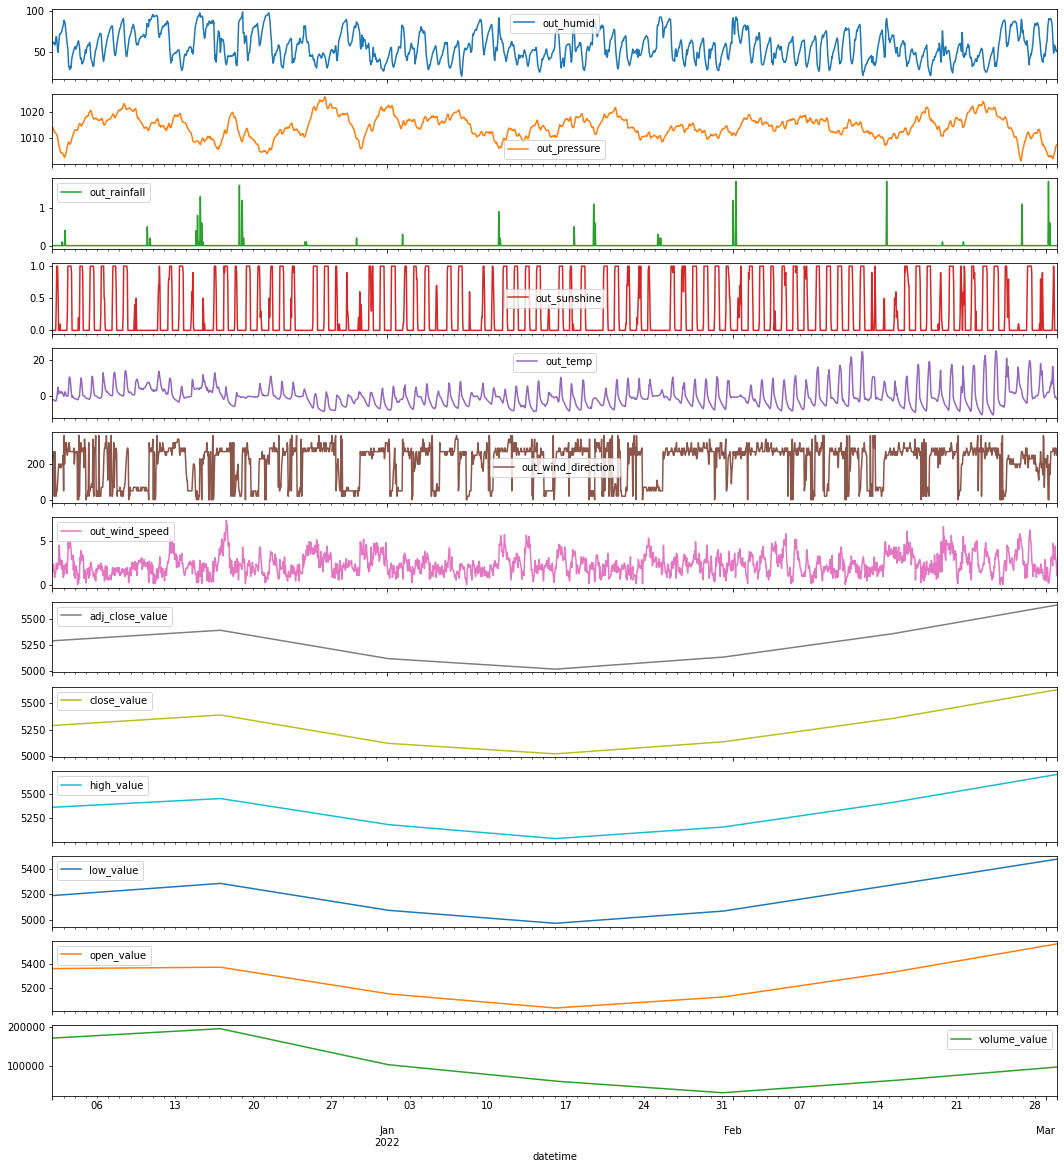

In [10]:
from KETIToolDataExploration.plot_graph import plot_features
plt.rcParams['figure.figsize'] =(18, 20)
plot_features.plot_all_feature_data(integrated_data_resample)